# Choosing the optimal location for drilling a well

## Project description

The oil producing company "GlavRosGosNeft" needs to find the best place to drill a well. We were provided with oil samples from three regions. The characteristics for each well in the region are already known.

**Tasks:**

- It is necessary to create a model to determine the region where mining will bring the greatest profit;
- Analyze possible profits and risks using the Bootstrap technique.


**Steps to select a location:**
- In the selected region, characteristics for wells are collected: the quality of oil and the volume of its reserves;
- Build a model to predict the volume of reserves in new wells;
- Select wells with the highest estimated values;
- Determine the region with the maximum total profit of the selected wells.

**Work plan:**
- Data loading
- Preprocessing
- Research analysis
- Correlation analysis
- Model training
- Preparation for profit calculation
- Profit calculation
- Summing up the work

**Files:**
- `geo_data_0.csv`
- `geo_data_1.csv`
- `geo_data_2.csv`

**Columns:**
- `id`—unique identifier of the well;
- `f0`, `f1`, `f2` - three signs of points (it doesn’t matter what they mean, but the signs themselves are significant);
- `product` — volume of reserves in the well (thousand barrels).

## Loading data

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

Settings

In [2]:
sns.set(style="darkgrid")
warnings.filterwarnings("ignore")

Saving files to dataframes

In [3]:
try:
    geo_data_0 = pd.read_csv('datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

Look at general information about dataframes

In [4]:
geo_data_0.info()
display(geo_data_0.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
4698,byaZ5,-0.968919,0.726950,-1.027267,38.752512
88145,F77KW,1.954400,0.423963,1.823986,104.933636
88061,B4irN,-0.813701,0.404811,2.307175,34.799550
6561,Qh0Ge,1.700702,-0.292941,1.011053,122.915949
55937,doV09,0.864342,0.401196,5.591266,4.823696


In [5]:
geo_data_1.info()
display(geo_data_1.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
80503,ZvUzW,-2.105380,-14.074684,1.994858,57.085625
55222,oWdRJ,1.914575,-0.172810,4.002058,107.813044
45924,HxjQc,9.976293,-9.635773,2.987542,80.859783
92780,hqL8k,0.514930,-5.251179,5.004877,134.766305
59043,hKnqG,2.627398,-0.843426,0.006494,3.179103


In [6]:
geo_data_2.info()
display(geo_data_2.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
31656,sybZz,-0.450262,-1.680942,-0.023228,64.061098
69430,B4r7q,1.606952,-0.846049,4.348614,158.588015
13584,eTNuS,-0.836093,0.025921,8.323325,132.048015
45563,kIoZ8,1.522402,1.929158,-2.646503,66.102161
69899,22qMM,-0.944572,-0.039277,-0.987538,72.696955


The data formats are fine. There are no obvious gaps in the columns.

## Preprocessing

Let's see if there are duplicate values in the `id` columns of each dataframe.

In [7]:
print(f'Duplicates in the id column in the geo_data_0 file:', geo_data_0['id'].duplicated().sum(), '\n')
print(f'Duplicates in the id column in the geo_data_1 file:', geo_data_1['id'].duplicated().sum(), '\n')
print(f'Duplicates in the id column in the geo_data_2 file', geo_data_2['id'].duplicated().sum(), '\n')

Duplicates in the id column in the geo_data_0 file: 10 

Duplicates in the id column in the geo_data_1 file: 4 

Duplicates in the id column in the geo_data_2 file 4 



We should get rid of lines like this

In [8]:
geo_data_0.drop_duplicates(subset=['id'], inplace=True)
print(geo_data_0.shape[0])

geo_data_1.drop_duplicates(subset=['id'], inplace=True)
print(geo_data_1.shape[0])

geo_data_2.drop_duplicates(subset=['id'], inplace=True)
print(geo_data_2.shape[0])

99990
99996
99996


Set an index on all columns

In [9]:
geo_data_0.set_index('id', inplace=True)
geo_data_1.set_index('id', inplace=True)
geo_data_2.set_index('id', inplace=True)

Let's check if there are complete duplicates

In [10]:
print("Number of duplicates in dataframe geo_data_0:", geo_data_0.duplicated().sum())
print("Number of duplicates in dataframe geo_data_1:", geo_data_1.duplicated().sum())
print("Number of duplicates in dataframe geo_data_2:", geo_data_2.duplicated().sum())


Number of duplicates in dataframe geo_data_0: 0
Number of duplicates in dataframe geo_data_1: 0
Number of duplicates in dataframe geo_data_2: 0


### Preprocessing results

- There are no gaps in the data;
- We removed duplicate `ids` in dataframes;
- We made sure that there were no complete duplicates in the data.

## Exploratory analysis

### Function

Сreate a function for plotting graphs for each attribute

In [11]:
def plotting(data):

    list_of_columns = [] 
    for column in data.columns:
        list_of_columns.append(column)
    
    l = len(list_of_columns)
  
    fig, ax = plt.subplots(2, l, figsize=(l*5, 10))

    for i in range(l):
        ax[0, i] = sns.histplot(data[list_of_columns[i]], ax=ax[0, i])
        ax[0, i].set_ylabel('Quantity')
        ax[0, i].set_xlabel('Value')
        ax[0, i].set_title(f'Histogram for {list_of_columns[i]} column')

        ax[1, i] = sns.boxplot(data[list_of_columns[i]], ax=ax[1, i])
        ax[1, i].set_ylabel('Quantity')
        ax[1, i].set_xlabel(f'Boxplot for {list_of_columns[i]} column')


    plt.show()

### geo_data_0

Let's look at the dataframe `geo_data_0`

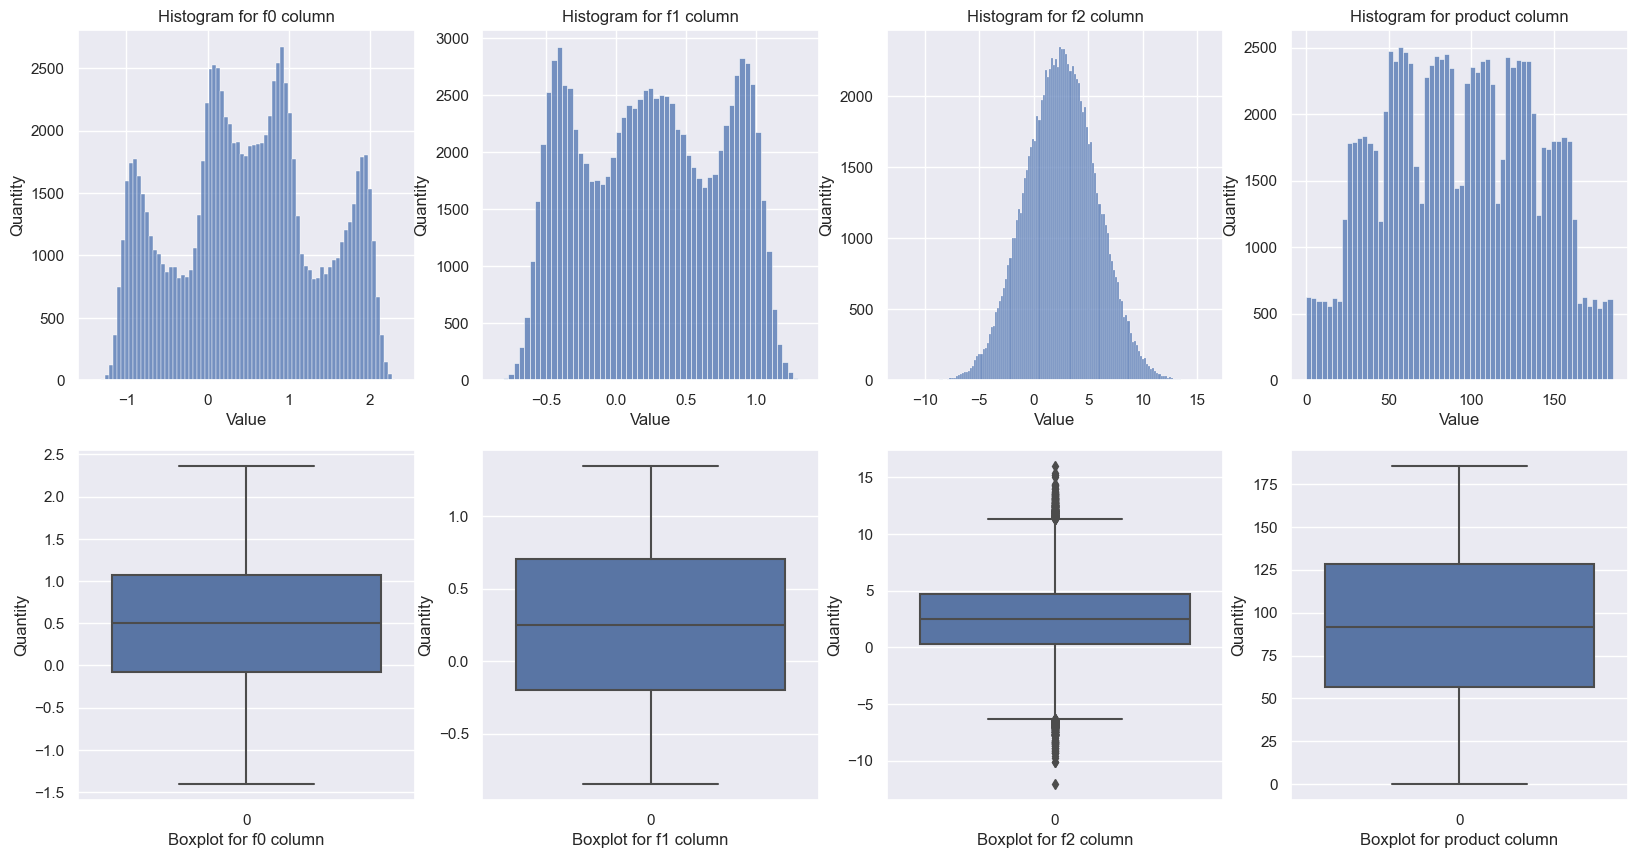

In [12]:
plotting(geo_data_0)

There is nothing noteworthy in the data

### geo_data_1

Look at the dataframe `geo_data_1`

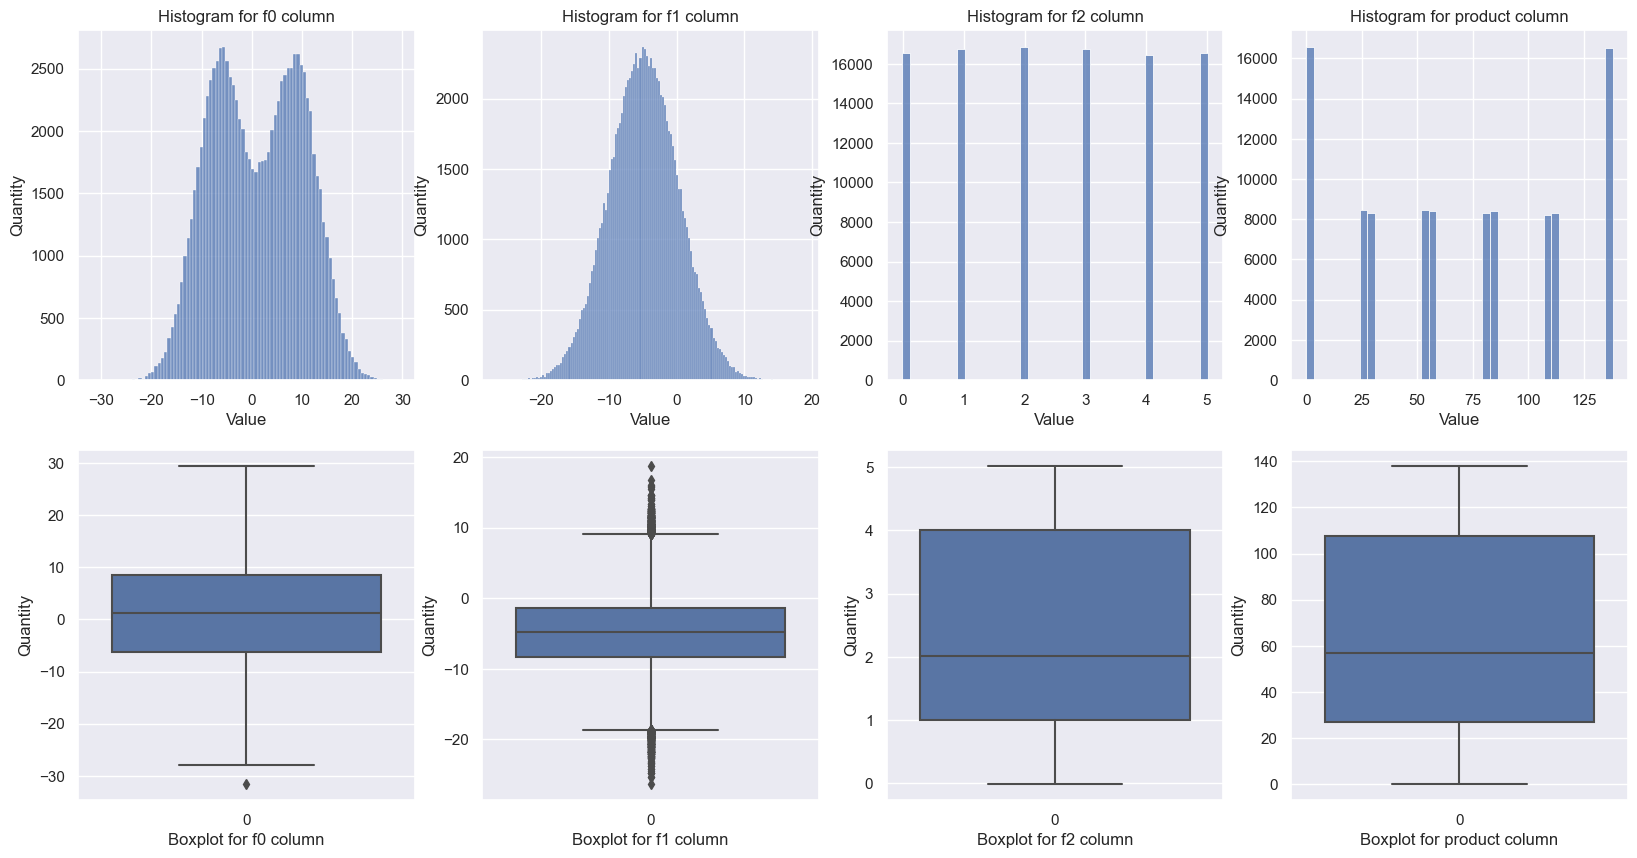

In [13]:
plotting(geo_data_1)

The `product` and `f2` columns have an unusual distribution compared to the previous dataframe, but there is nothing wrong with that

### geo_data_2

Look at the last dataframe `geo_data_2`

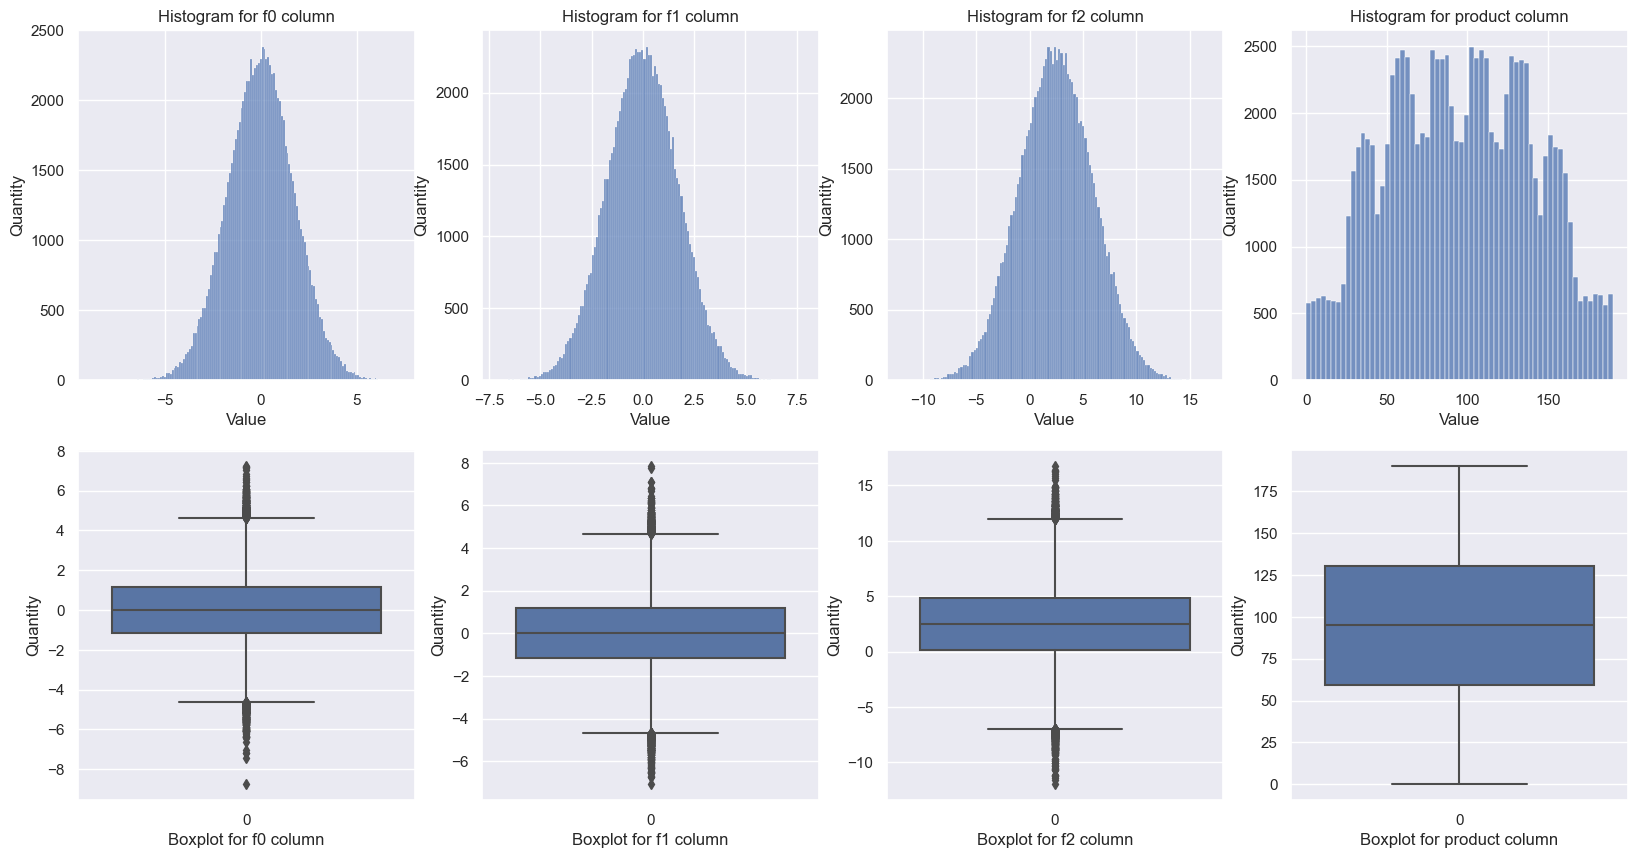

In [14]:
plotting(geo_data_2)

This dataframe is similar to `geo_data_0`. There is nothing unusual

### Conclusions

There are no anomalies in the data. The values in `geo_data_1` in columns `f2` and `product` are distributed very unusually compared to all other features. They have a clear separation, there are almost no intermediate values

## Correlation analysis

### Function

Create a function to build a matrix of correlations between features

In [15]:
def correlation_plot(data):

    input_columns = data.columns
    correlation_matrix = data[input_columns].corr() 

    plt.figure(figsize=(5, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation matrix')
    plt.show()

### geo_data_0

Look at the correlations in the dataframe `geo_data_0`

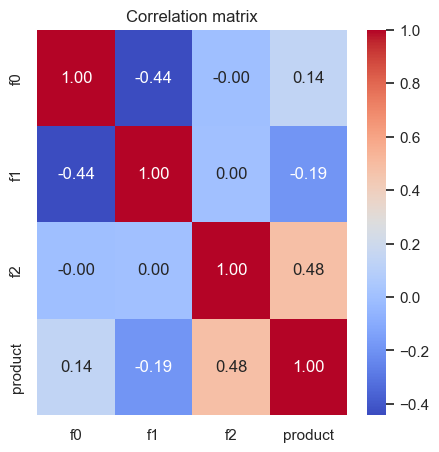

In [16]:
correlation_plot(geo_data_0)

There is a weak dependence between the feature `f2` and `product`. Let's look at it using scatterplot

Text(0.5, 1.0, 'Scatterplot between f2 and product')

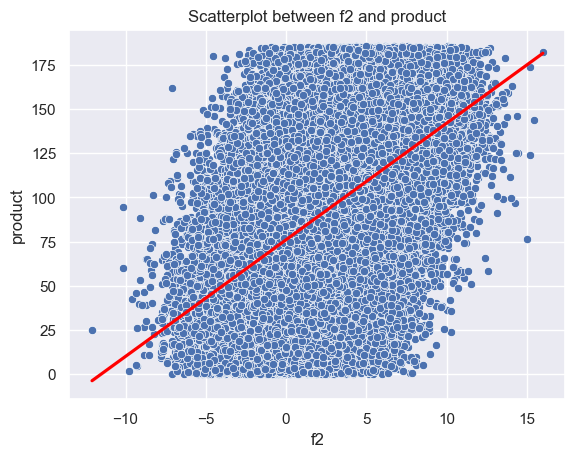

In [17]:
sns.scatterplot(x=geo_data_0['f2'], y=geo_data_0['product'])
sns.regplot(x=geo_data_0['f2'], y=geo_data_0['product'], scatter=False, color='red')
plt.title('Scatterplot between f2 and product')

The correlation is indeed very weak, one might say that it does not exist.

### geo_data_1

Look at the dataframe `geo_data_1`

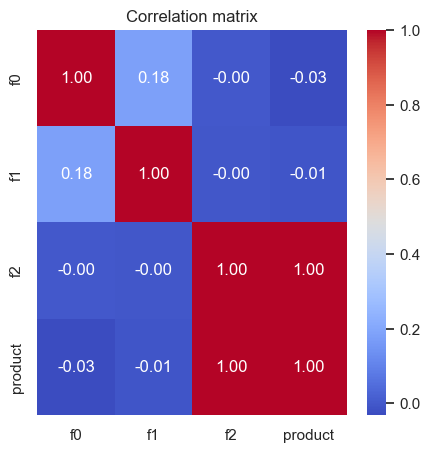

In [18]:
correlation_plot(geo_data_1)

100% correlation between trait `f2` and `product`

Text(0.5, 1.0, 'Scatterplot betweem f2 and product')

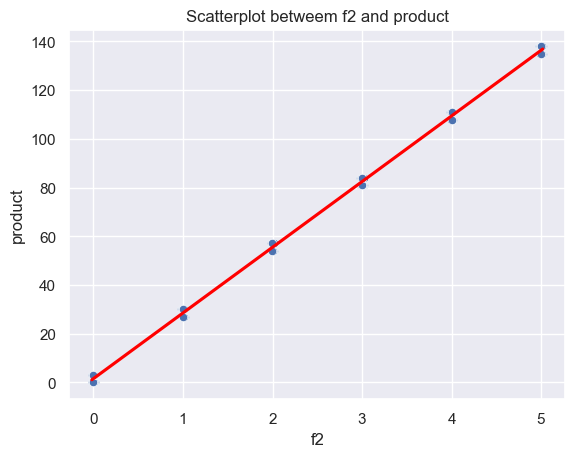

In [19]:
sns.scatterplot(x=geo_data_1['f2'], y=geo_data_1['product'])
sns.regplot(x=geo_data_1['f2'], y=geo_data_1['product'], scatter=False, color='red')
plt.title('Scatterplot betweem f2 and product')

### geo_data_2

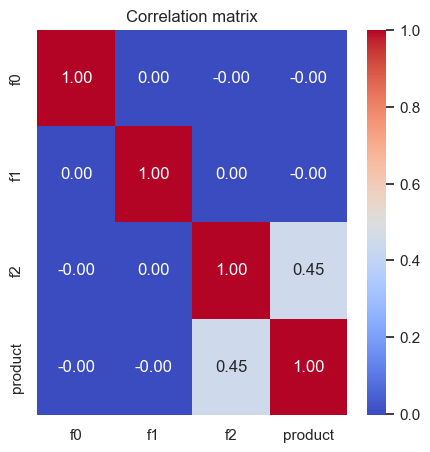

In [20]:
correlation_plot(geo_data_2)

There is a weak relationship between the `f2` feature and the target

Text(0.5, 1.0, 'Scatterplot between f2 and product')

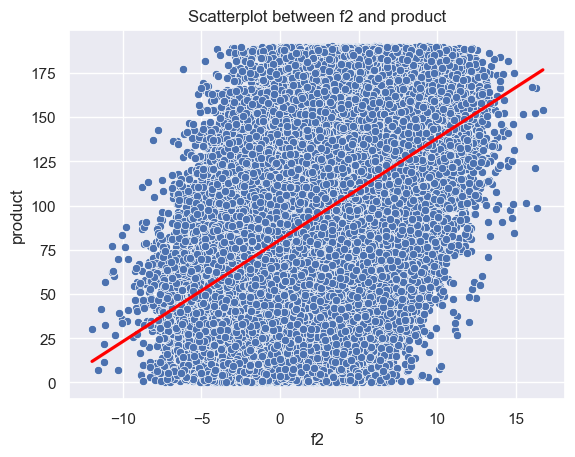

In [21]:
sns.scatterplot(x=geo_data_2['f2'], y=geo_data_2['product'])
sns.regplot(x=geo_data_2['f2'], y=geo_data_2['product'], scatter=False, color='red')
plt.title('Scatterplot between f2 and product')

A similar situation with the dataframe `geo_data_0`

### Results

- In dataframes `geo_data_0` and `geo_data_2` there is a small correlation (about 0.4) between the target feature and `f2`
- There is a linear relationship between the target feature and `f2` in the dataframe `geo_data_1`
- There is no multicollinearity among the characteristics

## Training models

### Function

Let's create a function for processing data and training the model. Using it, we will divide the data into samples, standardize the features, train the model on them and get predictions

In [22]:
def preproccesing_and_model(data, target, test_size=0.25, random_state=42):
    # Separate the target feature from the rest
    y = data[target]
    X = data.drop(target, axis=1)

    # Divide the data into samples
    X_train, X_valid, y_train, y_valid = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state 
    )
    
    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)

    return X_train, X_valid, y_train, y_valid, model, predictions
    

### geo_data_0

Train the model on the processed data and save everything into separate variables

In [23]:
X_train_0, X_valid_0, y_train_0, y_valid_0, model_0, predictions_0 = preproccesing_and_model(geo_data_0, 'product')

Let's look at the average stock of predicted raw materials and the `RMSE` model for the first region

In [24]:
print(f'Average stock of predicted raw materials in the first region: {round(predictions_0.mean(), 2)}, RMSE of the model: {round(mean_squared_error(y_valid_0, predictions_0)**.5, 2)}')

Average stock of predicted raw materials in the first region: 92.61, RMSE of the model: 37.69


### geo_data_1

We train the model again on standardized features and save all the data

In [25]:
X_train_1, X_valid_1, y_train_1, y_valid_1, model_1, predictions_1 = preproccesing_and_model(geo_data_1, 'product')

Look at the average stock of predicted raw materials and the `RMSE` model for the second region

In [26]:
print(f'Average stock of predicted raw materials in the second region: {round(predictions_1.mean(), 2)}, RMSE of the model: {round(mean_squared_error(y_valid_1, predictions_1)**.5, 2)}')

Average stock of predicted raw materials in the second region: 68.58, RMSE of the model: 0.89


Note that the average predicted stock of raw materials has decreased significantly, but now the model is almost correct. This is not surprising, because we previously discovered that in the data there is a linear relationship between the features `f2` and `product`

### geo_data_2

We get new samples and predictions for the third region

In [27]:
X_train_2, X_valid_2, y_train_2, y_valid_2, model_2, predictions_2 = preproccesing_and_model(geo_data_2, 'product')

Look at the statistics for this model

In [28]:
print(f'Average stock of predicted raw materials in the third region: {round(predictions_2.mean(), 2)}, RMSE of the model: {round(mean_squared_error(y_valid_2, predictions_2)**.5, 2)}')

Average stock of predicted raw materials in the third region: 94.93, RMSE of the model: 40.08


Here the model behaves in the same way as on the data of the first region

### Results

- The linear regression model behaves very well on the data of the second region, since there is a linear relationship between the features in the data. Average predicted stock of raw materials in the region: 68.58. Model `RMSE`: 0.89
- The same model behaves worse on the remaining data, since there are very few patterns in it. For the first and third regions, the average predicted raw material inventory is in the range between 92-95. `RMSE` for such models: ~38.5

## Preparing to calculate profit

We will find a sufficient supply of raw materials for a break-even profit. It is known that our budget is `10,000,000,000`, the income per unit of product is `450,000`, and in total `200` of the best predicted points are selected. Then the sufficient volume of raw materials is equal to `budget` / (`income per unit of product` * `number of best points`)

In [29]:
value = 10_000_000_000 / (450_000 * 200)
print(value)

111.11111111111111


It turns out that if a new well has `111,112` or more units of oil, then it will be profitable

The average stock of raw materials, as predicted by the linear regression model, ranges from 68 to 95 thousand barrels of oil per point. In order to make a profit from a particular geolocation, we will need to select the best points to exceed our target of `111,112` units of oil

## Calculation of profits and risks

Create a function to select the most profitable (according to the model prediction) points and calculate the possible profit

In [30]:
def best_spots(y_true, y_pred, count=200):
    y_true = y_true.reset_index(drop=True)
    indexes = pd.Series(y_pred, index=y_true.index).sort_values(ascending=False).index
    best_spots = y_true[indexes]
    revenue = best_spots[:count].sum()
    profit = revenue * 450_000 - 10_000_000_000
    return profit

In [31]:
print("Revenue from the first region:", best_spots(y_valid_0, predictions_0))
print("Revenue from the second region:", best_spots(y_valid_1, predictions_1))
print("Revenue from the third region:", best_spots(y_valid_2, predictions_2))

Revenue from the first region: 3468529787.422388
Revenue from the second region: 2415086696.681511
Revenue from the third region: 2396613000.939848


- Total profit from the 200 best points in the first region: `3,468,529,787` rubles;
- Total profit from the 200 best points in the second region: `2,415,086,696` rubles;
- Total profit from the 200 best points in the third region: `2,396,613,000` rubles.

In the first region the greatest profit could be made.

Find the average profit, 95% confidence interval and risk of loss in each region with a random selection of 500 points. To do this, first create a function to use the Bootstrap technique

In [32]:
STATE = np.random.RandomState(12345)

def bootstrap(y_true, y_pred, count=200, repeat=1000, selection=500):
    values = []

    for _ in range(repeat):
        true_sub = y_true.reset_index(drop=True).sample(selection, replace=True, random_state=STATE)
        predictions_sub = y_pred[true_sub.index]
        values.append(best_spots(true_sub, predictions_sub))

    values = pd.Series(values)
    
    # Mean profit
    mean_profit = values.mean()

    # 95th percentile
    lower = round(values.quantile(0.025), 2)
    upper = round(values.quantile(0.975), 2)

    # Probability of loss
    loss_proba = values[values < 0].count() / 1000

    return mean_profit, (lower, upper), loss_proba



Collect information about all regions into one table

In [33]:
mean_profit_0, range_95_0, loss_proba_0 = bootstrap(y_valid_0, predictions_0)
mean_profit_1, range_95_1, loss_proba_1 = bootstrap(y_valid_1, predictions_1)
mean_profit_2, range_95_2, loss_proba_2 = bootstrap(y_valid_2, predictions_2)

pd.DataFrame(index=['Average profit', '95th percentile', 'Probability of loss'], columns=['geo_data_0', 'geo_data_1', 'geo_data_2'], data=[
    [mean_profit_0, mean_profit_1, mean_profit_2],
    [range_95_0, range_95_1, range_95_2],
    [loss_proba_0, loss_proba_1, loss_proba_2],
])

,geo_data_0,geo_data_1,geo_data_2
Average profit,417354353.455637,435439669.460492,355874677.119614
95th percentile,"(-96261928.02, 933493095.5)","(25316237.21, 832287542.52)","(-208545070.38, 869925156.04)"
Probability of loss,0.059,0.019,0.098


The second region has the lowest chance of losses and the highest profitability. Since it is important for the company to select a geolocation with a probability of loss below 2.5%, it should pay attention to the second region (dataframe `geo_data_1`)

## Conclusions

### Description of tasks

Our task was to create a model to determine the region where oil production would bring the greatest profit. After that, we needed to analyze the possible profits and risks using the Bootstrap technique.

### Description of work stages

1. We have downloaded the data
2. We made sure that everything was fine with the data and removed duplicates
3. Conducted a small exploratory analysis
4. It was revealed that in the dataframe `geo_data_1` there is a linear relationship between the input and target features
5. Trained models and predicted the possible volume of oil for each region
6. We estimated the possible profit, confidence interval and probability of loss for each region based on model predictions

### Final conclusion

Since in the data frame `geo_data_1` there is a linear relationship between the feature `f2` and `product`, the model makes almost no errors in predictions. The `RMSE` of the model on this data was `0.9`, while for other regions this value was in the range between `37` and `41`.

Because of this quality of the model, the average profit that could be obtained using the model in the second region was `440,872,638` rubles, which is more than in the rest. The probability of losses in this region was `2%`, which is below the required threshold by `0.5%`.

Thus, a business should drill a well in the second region. This is where the company has the least chance of losses and the greatest potential profit.